In [41]:
import numpy as np
import matplotlib.pyplot as plt
from hlsf.models import *
%matplotlib qt

In [42]:
config = 'H'
lamp = 'Xe'
nb_line = 100

In [43]:
## For lamp, model
lsf_data = LSF_DATA(f"../exposures/ARC-{lamp}_CLEAR_20MAS_{config}_PRM.fits", f"../text/{lamp}.txt", f"../exposures/WAVECAL_TABLE_20MAS_{config}.fits", 
                        f"../exposures/SLITLET_TABLE_20MAS_{config}.fits", normal='Normal')
lsf_data.get_line_list().keys()

dict_keys([225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238])

In [44]:
## For evaluating
lsf1 = LSF_DATA("../exposures/ARC-linspace256_CLEAR_20MAS_H_PRM.fits", "../exposures/line_catalog_linspace256.fits", "../exposures/WAVECAL_TABLE_20MAS_H.fits", 
                        "../exposures/SLITLET_TABLE_20MAS_H.fits", normal='Normal')

In [45]:
data = lsf1.get_data_line(nb_line)
waves = data['map_wave']
w_0 = data['waveline']
lsf1 == lsf_data

True

## Gaussian model, quite good

In [46]:
mod = GAUSSIAN_MODEL_2(lsf_data)
mod.write_json(f'../file/{str.lower(mod.__class__.__name__)}_{config}_{lamp}.json')
mod._coeff

Destructor called


{'Amplitude': [0.9998456704266544, 9.21631739596086e-09],
 'Mean': [-0.00032635637976211496, 6.853191888361663e-08],
 'Sigma': [0.9308139627304847, 4.389461941384111e-06]}

In [47]:
fig = plt.figure()
ax = plt.axes()
plt.xlabel("wavelength")
plt.ylabel("RMS error")
lsf1.plot_line(nb_line, ax)
mod.plot(w_0, waves, ax)
plt.title(f'RMS error {mod.error_rms(lsf1, nb_line)}')
plt.legend()
plt.grid()
plt.show()

## Moffat
- Take times
- Overflow due to power of beta

In [48]:
mod_moffat = MOFFAT_MODEL_2(lsf_data)
mod_moffat.write_json(f'../file/{str.lower(mod_moffat.__class__.__name__)}_{config}_{lamp}.json')
mod_moffat_1 = MOFFAT_MODEL.from_json(f'../file/moffat_model_{config}_{lamp}.json')

Destructor called
Destructor called


In [49]:
mod_moffat._coeff

{'amplitude': [0.426747864654915, -1.7456825638859681e-06],
 'center': [-0.0004323979895597993, 7.462556499397075e-08],
 'sigma': [15.64425894255507, 2.3441457683782385e-06],
 'beta': [140.1274037983086, -0.0010432065724326031]}

In [50]:
fig, axes = plt.subplots(4, 1)
mod_moffat.plot_parameters(axes)
mod_moffat_1.plot_parameters(axes)
plt.xlabel("wavelength")
model = mod_moffat_1.__class__.__name__.replace('_',' ').capitalize()
fig.suptitle(model) 
plt.legend()
plt.show() 

In [51]:
mod_moffat_1.__class__.__name__

'MOFFAT_MODEL'

In [52]:
fig = plt.figure()
ax = plt.axes()
lsf1.plot_line(nb_line, ax)
mod_moffat.plot(w_0, waves, ax)
plt.grid()
plt.legend(['Real data', 'Moffat popt'])
plt.title(f'RMS error {mod_moffat.error_rms(lsf1, nb_line)}')
plt.show()

## Bad case for Gauss Hermite model
- Need to add bounds to each parameter

In [53]:
mod_hermite_1 = GAUSS_HERMITE_MODEL(lsf_data, deg=11)
mod_hermite_1.write_json(f'../file/{str.lower(mod_hermite_1.__class__.__name__)}_{config}_{lamp}.json')

Destructor called


In [54]:
mod_hermite_2 = GAUSS_HERMITE_MODEL_2(lsf_data, deg=11)
mod_hermite_2.write_json(f'../file/{str.lower(mod_hermite_2.__class__.__name__)}_{config}_{lamp}.json')
mod_hermite_2._coeff

Destructor called


{'Par0': [0.3400136006275718, -9.148043136207434e-07],
 'Par1': [-0.0002459428334058918, 7.798720950115453e-09],
 'Par2': [-0.03001952776583406, 1.96137458243727e-07],
 'Par3': [8.257738003046198e-05, -1.6545155663732602e-09],
 'Par4': [0.0012267647122183158, -9.704430246990447e-09],
 'Par5': [-6.062044817633766e-06, 1.1479798132366285e-10],
 'Par6': [-2.9805135758655813e-05, 2.494522328612287e-10],
 'Par7': [2.1619989287125827e-07, -4.205982423333122e-12],
 'Par8': [4.473043651300981e-07, -3.760968361464268e-12],
 'Par9': [-4.272354585141895e-09, 8.583174108208993e-14],
 'Par10': [-3.70661484529193e-09, 2.974152678464523e-14],
 'Par11': [4.3840802822772216e-11, -7.672207860121974e-16]}

In [55]:
mod_hermite_2.write_json(f'../file/{str.lower(mod_hermite_2.__class__.__name__)}_{config}_{lamp}.json')

In [9]:
fig = plt.figure()
ax = plt.axes()
mod_hermite_1.plot_error_rms(lsf1, ax)
mod_hermite_2.plot_error_rms(lsf1, ax)
plt.grid()
plt.legend(['Gauss Hermite linear', 'Gauss Hermite popt'])
plt.show()

In [10]:
fig = plt.figure()
ax = plt.axes()
lsf1.plot_line(nb_line, ax)
mod_hermite_1.plot(w_0, waves, ax)
mod_hermite_2.plot(w_0, waves, ax)
plt.grid()
plt.legend(['Real data', 'Gauss Hermite linear', 'Gauss Hermite popt'])
plt.show()

## Test case for numerous lamps

In [85]:
lamps = ["Ar", "Kr", "Ne", "Xe"]
config = 'HK'

In [ ]:
for i in range(len(lamps)):
    for j in range(i+1, len(lamps)):
        lsf_data = [LSF_DATA(f'../exposures/ARC-{lamps[i]}_CLEAR_20MAS_{config}_PRM.fits', f"../text/{lamps[i]}.txt", f"../exposures/WAVECAL_TABLE_20MAS_{config}.fits", f"../exposures/SLITLET_TABLE_20MAS_{config}.fits", file_flat=f"../exposures/FLAT-CONT2_CLEAR_20MAS_{config}_PRM.fits"), 
            LSF_DATA(f'../exposures/ARC-{lamps[j]}_CLEAR_20MAS_{config}_PRM.fits', f"../text/{lamps[j]}.txt", f"../exposures/WAVECAL_TABLE_20MAS_{config}.fits", f"../exposures/SLITLET_TABLE_20MAS_{config}.fits", file_flat=f"../exposures/FLAT-CONT2_CLEAR_20MAS_{config}_PRM.fits")]
        mod = GAUSSIAN_MODEL_2(lsf_data)
        mod.write_json(f'{str.lower(mod.__class__.__name__)}_{config}_{lamps[i]}-{lamps[j]}.json')

In [86]:
mod_gauss = GAUSSIAN_MODEL_2.from_json('gaussian_model_2_HK_Ar-Kr.json')
lsf1 = LSF_DATA("../exposures/ARC-linspace256_CLEAR_20MAS_HK_PRM.fits", "../exposures/line_catalog_linspace256.fits", "../exposures/WAVECAL_TABLE_20MAS_HK.fits", 
                        "../exposures/SLITLET_TABLE_20MAS_HK.fits", file_flat="../exposures/FLAT-CONT2_CLEAR_20MAS_HK_PRM.fits")

/home/ngo/.local/lib/python3.7/site-packages/hlsf/models/lsf_data.py:80: RuntimeWarning: divide by zero encountered in true_divide
  self._image = hdul['CHIP'+str(self.detID)+'.DATA'].data/hdul_flat['CHIP'+str(self.detID)+'.DATA'].data
/home/ngo/.local/lib/python3.7/site-packages/hlsf/models/lsf_data.py:80: RuntimeWarning: invalid value encountered in true_divide
  self._image = hdul['CHIP'+str(self.detID)+'.DATA'].data/hdul_flat['CHIP'+str(self.detID)+'.DATA'].data
/home/ngo/.local/lib/python3.7/site-packages/hlsf/models/lsf_data.py:80: RuntimeWarning: divide by zero encountered in true_divide
  self._image = hdul['CHIP'+str(self.detID)+'.DATA'].data/hdul_flat['CHIP'+str(self.detID)+'.DATA'].data
/home/ngo/.local/lib/python3.7/site-packages/hlsf/models/lsf_data.py:80: RuntimeWarning: invalid value encountered in true_divide
  self._image = hdul['CHIP'+str(self.detID)+'.DATA'].data/hdul_flat['CHIP'+str(self.detID)+'.DATA'].data
/home/ngo/.local/lib/python3.7/site-packages/hlsf/models/l

In [87]:
mod_gauss._popt

[9.425063227865992,
 -0.8463935870195247,
 -0.8371198276898448,
 2.4152391630958827,
 3.610295424929629,
 0.012775119321503874]

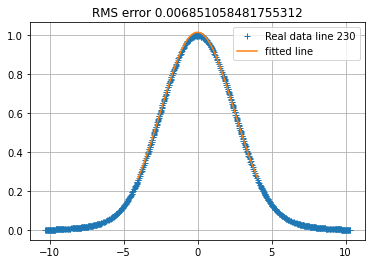

In [89]:
fig = plt.figure()
ax = plt.axes()
lsf1.plot_line(nb_line, ax)
mod_gauss.plot(w_0, waves, ax)
plt.grid()
plt.legend([f'Real data line {nb_line}', 'fitted line'])
plt.title(f'RMS error {mod_gauss.error_rms(lsf1, nb_line)}')
plt.show()